In [154]:
import conda

In [155]:
import lda

In [156]:
import lda.datasets

In [157]:
import gensim

In [158]:
import nltk

In [159]:
from nltk.corpus import stopwords

In [160]:
from nltk.stem.wordnet import WordNetLemmatizer

In [161]:
import string

# Coverting csv file into a list:

In [162]:
ls *.csv

 Volume in drive C has no label.
 Volume Serial Number is 5682-6DAE

 Directory of C:\Users\Papar

21/10/2017  09:30 PM           312,593 AdamSavageComments.csv
20/11/2017  02:31 PM           133,597 FrequenciesResultsShort.csv
20/11/2017  02:32 PM            87,468 FrequenciesResultsShortFlip.csv
16/10/2017  02:16 PM             2,372 RAW.csv
29/11/2017  02:33 PM            15,691 Sample _ColumbiaIceField.csv
02/12/2017  06:18 PM            14,985 Sample.csv
09/11/2017  05:56 PM                 0 testreview.csv
               7 File(s)        566,706 bytes
               0 Dir(s)   9,436,839,936 bytes free


In [163]:
import csv

with open('sample.csv', 'r') as f:
  reader = csv.reader(f)
  data_list = list(reader)

print(data_list)

[['It was thrilling to take the bus onto the glacier and walk around it. We parked our RV in the parking lot facing the glacier after the excursion. It is hard to describe how beautiful the scenery is....a must see. Not far from the glacier is the glass sidewalk over the canyon....a real mind blower. The Rocky Mountains truly rejuvenate the soul.'], ['We parked at the glacier car park (on the other side of the road to the main park centre). The car park gets quite full but we did manage to jag a spot immediately. The walk up from there to the bottom of the glacier is quite steep and takes 10-20 mins at least depending on how you feel. It can also be a bit slippery with loose gravel and rocks. On the way, note the signs that show where the glacier was in the recent past - and some people say there is no climate change? It may be for normal, natural, cyclical reasons but the glacier is definitely receding. I found it interesting to see the scratches on the rock from where the glacier had

In [164]:
import csv
data_list2 = []
with open('sample.csv', 'r') as file: # This makes sure that file is closed after reading
    data = csv.reader(file)
    for row in data:
        data_list2.append(row[0]) # This puts all the data from column 5 into a list
    file.close()

len(data_list2)

30

In [165]:
type(data_list2)

list

In [166]:
print(data_list2)

['It was thrilling to take the bus onto the glacier and walk around it. We parked our RV in the parking lot facing the glacier after the excursion. It is hard to describe how beautiful the scenery is....a must see. Not far from the glacier is the glass sidewalk over the canyon....a real mind blower. The Rocky Mountains truly rejuvenate the soul.', 'We parked at the glacier car park (on the other side of the road to the main park centre). The car park gets quite full but we did manage to jag a spot immediately. The walk up from there to the bottom of the glacier is quite steep and takes 10-20 mins at least depending on how you feel. It can also be a bit slippery with loose gravel and rocks. On the way, note the signs that show where the glacier was in the recent past - and some people say there is no climate change? It may be for normal, natural, cyclical reasons but the glacier is definitely receding. I found it interesting to see the scratches on the rock from where the glacier had mo

# but this is a list of list!! I want a list! Because it can not be lowered then!

# Just fixed the issue, the appropriate data to use is "data_list2", which is a list!! YOOHOO!!

In [167]:
len(data_list)

30

# how about converting the txt file (string) into list?

In [168]:
ls *.txt

 Volume in drive C has no label.
 Volume Serial Number is 5682-6DAE

 Directory of C:\Users\Papar

30/10/2017  09:37 AM                 0 1986.txt
30/10/2017  09:43 AM                 0 Anthony86.txt
16/09/2017  02:31 PM               263 ASCII_LOGO.txt
02/10/2017  11:39 PM               124 bigdata.txt
14/10/2017  02:05 PM             2,665 funConcordance.txt
04/11/2017  09:43 AM                49 Negative.words.txt
30/11/2017  12:07 PM                 0 nly_reviews.txt
04/11/2017  09:33 AM                53 Obama.tweets.txt
30/11/2017  12:04 PM            14,961 Only_reviews.txt
16/10/2017  10:37 AM         1,223,517 Output.txt
29/10/2017  12:11 PM                 0 Output2.txt
04/11/2017  09:42 AM                49 Positive.words.txt
16/10/2017  10:37 AM            57,698 powerConcordance.txt
16/09/2017  02:31 PM                69 requirements.txt
30/10/2017  09:55 AM                 0 Robbins1986.txt
30/10/2017  09:39 AM         1,137,388 Robbins1991.txt
29/11/2017  11:33 AM       

# Generating LDA model, an example:

In [210]:
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer(r'\w+')

In [209]:
raw = data_list2[0].lower()
tokens = tokenizer.tokenize(raw)

print(tokens)

['it', 'was', 'thrilling', 'to', 'take', 'the', 'bus', 'onto', 'the', 'glacier', 'and', 'walk', 'around', 'it', 'we', 'parked', 'our', 'rv', 'in', 'the', 'parking', 'lot', 'facing', 'the', 'glacier', 'after', 'the', 'excursion', 'it', 'is', 'hard', 'to', 'describe', 'how', 'beautiful', 'the', 'scenery', 'is', 'a', 'must', 'see', 'not', 'far', 'from', 'the', 'glacier', 'is', 'the', 'glass', 'sidewalk', 'over', 'the', 'canyon', 'a', 'real', 'mind', 'blower', 'the', 'rocky', 'mountains', 'truly', 'rejuvenate', 'the', 'soul']


In [184]:
from stop_words import get_stop_words

# create English stop words list
en_stop = get_stop_words('en')

In [186]:
stopped_tokens = [i for i in tokens if not i in en_stop]

print(stopped_tokens)

['thrilling', 'take', 'bus', 'onto', 'glacier', 'walk', 'around', 'parked', 'rv', 'parking', 'lot', 'facing', 'glacier', 'excursion', 'hard', 'describe', 'beautiful', 'scenery', 'must', 'see', 'far', 'glacier', 'glass', 'sidewalk', 'canyon', 'real', 'mind', 'blower', 'rocky', 'mountains', 'truly', 'rejuvenate', 'soul']


In [187]:
from nltk.stem.porter import PorterStemmer

# Create p_stemmer of class PorterStemmer
p_stemmer = PorterStemmer()

In [190]:
# stem token
texts = [p_stemmer.stem(i) for i in stopped_tokens]

print(stemmed_tokens)

['excurs', 'includ', 'part', 'rocki', 'mountain', 'vacat', 'amaz', 'ye', 'visitor', 'centr', 'bit', 'tourist', 'trap', 'modern', 'clean', 'park', 'canada', 'kiosk', 'multilingu', 'attend', 'answer', 'question', 'jasper', 'nation', 'park', 'bit', 'wait', 'get', 'glacier', 'climber', 'neat', 'buggi', 'driver', 'nick', 'knowledg', 'glacier', 'icefield', 'differ', 'told', 'stori', 'answer', 'question', 'actual', 'time', 'icefield', 'limit', 'control', 'glad', 'ice', 'retreat', 'quit', 'rate', 'lifetim', 'experi', 'us']


In [199]:
print(texts)

['thrill', 'take', 'bu', 'onto', 'glacier', 'walk', 'around', 'park', 'rv', 'park', 'lot', 'face', 'glacier', 'excurs', 'hard', 'describ', 'beauti', 'sceneri', 'must', 'see', 'far', 'glacier', 'glass', 'sidewalk', 'canyon', 'real', 'mind', 'blower', 'rocki', 'mountain', 'truli', 'rejuven', 'soul']


In [192]:
print(dictionary.token2id)

{'thrill': 0, 'take': 1, 'bu': 2, 'onto': 3, 'glacier': 4, 'walk': 5, 'around': 6, 'park': 7, 'rv': 8, 'lot': 9, 'face': 10, 'excurs': 11, 'hard': 12, 'describ': 13, 'beauti': 14, 'sceneri': 15, 'must': 16, 'see': 17, 'far': 18, 'glass': 19, 'sidewalk': 20, 'canyon': 21, 'real': 22, 'mind': 23, 'blower': 24, 'rocki': 25, 'mountain': 26, 'truli': 27, 'rejuven': 28, 'soul': 29, 'car': 30, 'side': 31, 'road': 32, 'main': 33, 'centr': 34, 'get': 35, 'quit': 36, 'full': 37, 'manag': 38, 'jag': 39, 'spot': 40, 'immedi': 41, 'bottom': 42, 'steep': 43, '10': 44, '20': 45, 'min': 46, 'least': 47, 'depend': 48, 'feel': 49, 'can': 50, 'also': 51, 'bit': 52, 'slipperi': 53, 'loos': 54, 'gravel': 55, 'rock': 56, 'way': 57, 'note': 58, 'sign': 59, 'show': 60, 'recent': 61, 'past': 62, 'peopl': 63, 'say': 64, 'climat': 65, 'chang': 66, 'may': 67, 'normal': 68, 'natur': 69, 'cyclic': 70, 'reason': 71, 'definit': 72, 'reced': 73, 'found': 74, 'interest': 75, 'scratch': 76, 'move': 77, 'fewer': 78, 'mig

In [198]:
from gensim import corpora, models
dictionary = corpora.Dictionary(texts)

TypeError: doc2bow expects an array of unicode tokens on input, not a single string

In [196]:
corpus = [dictionary.doc2bow(text) for text in texts]

TypeError: doc2bow expects an array of unicode tokens on input, not a single string

In [171]:
print(en_stop)

['a', 'about', 'above', 'after', 'again', 'against', 'all', 'am', 'an', 'and', 'any', 'are', "aren't", 'as', 'at', 'be', 'because', 'been', 'before', 'being', 'below', 'between', 'both', 'but', 'by', "can't", 'cannot', 'could', "couldn't", 'did', "didn't", 'do', 'does', "doesn't", 'doing', "don't", 'down', 'during', 'each', 'few', 'for', 'from', 'further', 'had', "hadn't", 'has', "hasn't", 'have', "haven't", 'having', 'he', "he'd", "he'll", "he's", 'her', 'here', "here's", 'hers', 'herself', 'him', 'himself', 'his', 'how', "how's", 'i', "i'd", "i'll", "i'm", "i've", 'if', 'in', 'into', 'is', "isn't", 'it', "it's", 'its', 'itself', "let's", 'me', 'more', 'most', "mustn't", 'my', 'myself', 'no', 'nor', 'not', 'of', 'off', 'on', 'once', 'only', 'or', 'other', 'ought', 'our', 'ours', 'ourselves', 'out', 'over', 'own', 'same', "shan't", 'she', "she'd", "she'll", "she's", 'should', "shouldn't", 'so', 'some', 'such', 'than', 'that', "that's", 'the', 'their', 'theirs', 'them', 'themselves', 't

In [200]:
import nltk
from nltk.stem.porter import PorterStemmer

# Create p_stemmer of class PorterStemmer
p_stemmer = PorterStemmer()

In [201]:
from gensim import corpora, models

dictionary = corpora.Dictionary()

#Now we are doing all of these steps for the whole available text (data_list2 here):

In [253]:
texts = []

# loop through document list
for i in data_list2:
    
    # clean and tokenize document string
    raw = i.lower()
    tokens = tokenizer.tokenize(raw)

    # remove stop words from tokens
    stopped_tokens = [i for i in tokens if not i in en_stop]
    
    # stem tokens
    stemmed_tokens = [p_stemmer.stem(i) for i in stopped_tokens]
    
    # add tokens to list
    texts.append(stemmed_tokens)

# turn our tokenized documents into a id <-> term dictionary
dictionary = corpora.Dictionary(texts)
    
# convert tokenized documents into a document-term matrix
corpus = [dictionary.doc2bow(text) for text in texts]

# generate LDA model
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics=5, id2word = dictionary, passes=20)

INFO:gensim.corpora.dictionary:adding document #0 to Dictionary(0 unique tokens: [])
INFO:gensim.corpora.dictionary:built Dictionary(629 unique tokens: ['thrill', 'take', 'bu', 'onto', 'glacier']...) from 30 documents (total 1392 corpus positions)
INFO:gensim.models.ldamodel:using symmetric alpha at 0.2
INFO:gensim.models.ldamodel:using symmetric eta at 0.001589825119236884
INFO:gensim.models.ldamodel:using serial LDA version on this node
INFO:gensim.models.ldamodel:running online (multi-pass) LDA training, 5 topics, 20 passes over the supplied corpus of 30 documents, updating model once every 30 documents, evaluating perplexity every 30 documents, iterating 50x with a convergence threshold of 0.001000
INFO:gensim.models.ldamodel:-8.552 per-word bound, 375.4 perplexity estimate based on a held-out corpus of 30 documents with 1392 words
INFO:gensim.models.ldamodel:PROGRESS: pass 0, at document #30/30
INFO:gensim.models.ldamodel:topic #0 (0.200): 0.018*"ice" + 0.013*"field" + 0.012*"time

INFO:gensim.models.ldamodel:-6.522 per-word bound, 91.9 perplexity estimate based on a held-out corpus of 30 documents with 1392 words
INFO:gensim.models.ldamodel:PROGRESS: pass 6, at document #30/30
INFO:gensim.models.ldamodel:topic #0 (0.200): 0.016*"ice" + 0.011*"field" + 0.011*"time" + 0.011*"drive" + 0.011*"icefield" + 0.011*"question" + 0.011*"answer" + 0.011*"park" + 0.011*"bit" + 0.011*"glacier"
INFO:gensim.models.ldamodel:topic #1 (0.200): 0.023*"glacier" + 0.020*"walk" + 0.018*"ice" + 0.012*"see" + 0.012*"visit" + 0.012*"bu" + 0.012*"nice" + 0.009*"field" + 0.009*"tour" + 0.009*"drive"
INFO:gensim.models.ldamodel:topic #2 (0.200): 0.031*"glacier" + 0.025*"walk" + 0.025*"time" + 0.019*"s" + 0.013*"will" + 0.010*"park" + 0.010*"amaz" + 0.010*"visit" + 0.010*"worth" + 0.010*"just"
INFO:gensim.models.ldamodel:topic #3 (0.200): 0.040*"glacier" + 0.021*"ice" + 0.016*"take" + 0.015*"tour" + 0.014*"see" + 0.013*"park" + 0.011*"walk" + 0.010*"get" + 0.010*"field" + 0.010*"s"
INFO:gens

INFO:gensim.models.ldamodel:topic #3 (0.200): 0.040*"glacier" + 0.021*"ice" + 0.016*"take" + 0.015*"tour" + 0.014*"see" + 0.014*"park" + 0.011*"walk" + 0.010*"get" + 0.010*"s" + 0.010*"field"
INFO:gensim.models.ldamodel:topic #4 (0.200): 0.017*"field" + 0.017*"ice" + 0.017*"sky" + 0.017*"see" + 0.014*"jasper" + 0.010*"amaz" + 0.010*"went" + 0.010*"festiv" + 0.010*"dark" + 0.010*"guid"
INFO:gensim.models.ldamodel:topic diff=0.003402, rho=0.267261
INFO:gensim.models.ldamodel:-6.519 per-word bound, 91.7 perplexity estimate based on a held-out corpus of 30 documents with 1392 words
INFO:gensim.models.ldamodel:PROGRESS: pass 13, at document #30/30
INFO:gensim.models.ldamodel:topic #0 (0.200): 0.016*"ice" + 0.011*"field" + 0.011*"drive" + 0.011*"time" + 0.011*"icefield" + 0.011*"question" + 0.011*"answer" + 0.011*"park" + 0.011*"bit" + 0.011*"glacier"
INFO:gensim.models.ldamodel:topic #1 (0.200): 0.023*"glacier" + 0.020*"walk" + 0.018*"ice" + 0.012*"see" + 0.012*"visit" + 0.012*"bu" + 0.012*

INFO:gensim.models.ldamodel:topic #1 (0.200): 0.023*"glacier" + 0.020*"walk" + 0.018*"ice" + 0.012*"visit" + 0.012*"bu" + 0.012*"see" + 0.012*"nice" + 0.009*"tour" + 0.009*"drive" + 0.009*"field"
INFO:gensim.models.ldamodel:topic #2 (0.200): 0.031*"glacier" + 0.025*"time" + 0.025*"walk" + 0.019*"s" + 0.013*"will" + 0.010*"amaz" + 0.010*"park" + 0.010*"visit" + 0.010*"worth" + 0.010*"tour"
INFO:gensim.models.ldamodel:topic #3 (0.200): 0.040*"glacier" + 0.021*"ice" + 0.016*"take" + 0.015*"tour" + 0.014*"see" + 0.014*"park" + 0.011*"walk" + 0.010*"get" + 0.010*"s" + 0.010*"field"
INFO:gensim.models.ldamodel:topic #4 (0.200): 0.017*"field" + 0.017*"ice" + 0.017*"see" + 0.017*"sky" + 0.014*"jasper" + 0.010*"amaz" + 0.010*"inform" + 0.010*"guid" + 0.010*"went" + 0.010*"festiv"
INFO:gensim.models.ldamodel:topic diff=0.000398, rho=0.218218


In [254]:
print(ldamodel.print_topics(num_topics=5, num_words=10))

INFO:gensim.models.ldamodel:topic #0 (0.200): 0.016*"ice" + 0.011*"field" + 0.011*"drive" + 0.011*"icefield" + 0.011*"time" + 0.011*"bit" + 0.011*"question" + 0.011*"park" + 0.011*"answer" + 0.011*"glacier"
INFO:gensim.models.ldamodel:topic #1 (0.200): 0.023*"glacier" + 0.020*"walk" + 0.018*"ice" + 0.012*"visit" + 0.012*"bu" + 0.012*"see" + 0.012*"nice" + 0.009*"tour" + 0.009*"drive" + 0.009*"field"
INFO:gensim.models.ldamodel:topic #2 (0.200): 0.031*"glacier" + 0.025*"time" + 0.025*"walk" + 0.019*"s" + 0.013*"will" + 0.010*"amaz" + 0.010*"park" + 0.010*"visit" + 0.010*"worth" + 0.010*"tour"
INFO:gensim.models.ldamodel:topic #3 (0.200): 0.040*"glacier" + 0.021*"ice" + 0.016*"take" + 0.015*"tour" + 0.014*"see" + 0.014*"park" + 0.011*"walk" + 0.010*"get" + 0.010*"s" + 0.010*"field"
INFO:gensim.models.ldamodel:topic #4 (0.200): 0.017*"field" + 0.017*"ice" + 0.017*"see" + 0.017*"sky" + 0.014*"jasper" + 0.010*"amaz" + 0.010*"inform" + 0.010*"guid" + 0.010*"went" + 0.010*"festiv"


[(0, '0.016*"ice" + 0.011*"field" + 0.011*"drive" + 0.011*"icefield" + 0.011*"time" + 0.011*"bit" + 0.011*"question" + 0.011*"park" + 0.011*"answer" + 0.011*"glacier"'), (1, '0.023*"glacier" + 0.020*"walk" + 0.018*"ice" + 0.012*"visit" + 0.012*"bu" + 0.012*"see" + 0.012*"nice" + 0.009*"tour" + 0.009*"drive" + 0.009*"field"'), (2, '0.031*"glacier" + 0.025*"time" + 0.025*"walk" + 0.019*"s" + 0.013*"will" + 0.010*"amaz" + 0.010*"park" + 0.010*"visit" + 0.010*"worth" + 0.010*"tour"'), (3, '0.040*"glacier" + 0.021*"ice" + 0.016*"take" + 0.015*"tour" + 0.014*"see" + 0.014*"park" + 0.011*"walk" + 0.010*"get" + 0.010*"s" + 0.010*"field"'), (4, '0.017*"field" + 0.017*"ice" + 0.017*"see" + 0.017*"sky" + 0.014*"jasper" + 0.010*"amaz" + 0.010*"inform" + 0.010*"guid" + 0.010*"went" + 0.010*"festiv"')]


In [203]:
print(ldamodel)
type(ldamodel)

LdaModel(num_terms=629, num_topics=2, decay=0.5, chunksize=2000)


gensim.models.ldamodel.LdaModel

In [204]:
type(dictionary)

gensim.corpora.dictionary.Dictionary

In [205]:
print(dictionary)

Dictionary(629 unique tokens: ['thrill', 'take', 'bu', 'onto', 'glacier']...)


In [206]:
type(corpus)

list

In [207]:
len(corpus)

30

In [238]:
print(corpus)

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 3), (5, 1), (6, 1), (7, 2), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1)], [(1, 1), (4, 7), (5, 2), (7, 5), (12, 1), (17, 2), (30, 3), (31, 1), (32, 2), (33, 1), (34, 2), (35, 1), (36, 3), (37, 1), (38, 1), (39, 1), (40, 1), (41, 1), (42, 1), (43, 1), (44, 1), (45, 1), (46, 1), (47, 1), (48, 1), (49, 1), (50, 1), (51, 1), (52, 1), (53, 1), (54, 1), (55, 1), (56, 2), (57, 1), (58, 1), (59, 1), (60, 1), (61, 1), (62, 1), (63, 2), (64, 1), (65, 1), (66, 1), (67, 1), (68, 1), (69, 1), (70, 1), (71, 2), (72, 1), (73, 1), (74, 1), (75, 1), (76, 1), (77, 1), (78, 1), (79, 1), (80, 1), (81, 1), (82, 1), (83, 1), (84, 1), (85, 1), (86, 1), (87, 1), (88, 1), (89, 1)], [(4, 1), (5, 1), (6, 2), (12, 1), (18, 1), (56, 1), (67, 1), (69, 1), (83, 1), (90, 2), (91, 2), (92, 1), (93, 1), (94, 1), (95, 1), (96, 1), (97

# End of the coding in the following address:
## https://rstudio-pubs-static.s3.amazonaws.com/79360_850b2a69980c4488b1db95987a24867a.html#sample-script-in-full

In [9]:
ls *.txt

 Volume in drive C has no label.
 Volume Serial Number is 5682-6DAE

 Directory of C:\Users\Papar

30/10/2017  09:37 AM                 0 1986.txt
30/10/2017  09:43 AM                 0 Anthony86.txt
16/09/2017  02:31 PM               263 ASCII_LOGO.txt
02/10/2017  11:39 PM               124 bigdata.txt
14/10/2017  02:05 PM             2,665 funConcordance.txt
04/11/2017  09:43 AM                49 Negative.words.txt
30/11/2017  12:07 PM                 0 nly_reviews.txt
04/11/2017  09:33 AM                53 Obama.tweets.txt
30/11/2017  12:04 PM            14,961 Only_reviews.txt
16/10/2017  10:37 AM         1,223,517 Output.txt
29/10/2017  12:11 PM                 0 Output2.txt
04/11/2017  09:42 AM                49 Positive.words.txt
16/10/2017  10:37 AM            57,698 powerConcordance.txt
16/09/2017  02:31 PM                69 requirements.txt
30/10/2017  09:55 AM                 0 Robbins1986.txt
30/10/2017  09:39 AM         1,137,388 Robbins1991.txt
23/10/2017  02:26 PM       

In [102]:
with open('Only_reviews.txt','r') as myfile:
    data_string=myfile.read().replace('\n','')

In [103]:
print(data_string)

ReviewIt was thrilling to take the bus onto the glacier and walk around it. We parked our RV in the parking lot facing the glacier after the excursion. It is hard to describe how beautiful the scenery is....a must see. Not far from the glacier is the glass sidewalk over the canyon....a real mind blower. The Rocky Mountains truly rejuvenate the soul."We parked at the glacier car park (on the other side of the road to the main park centre). The car park gets quite full but we did manage to jag a spot immediately. The walk up from there to the bottom of the glacier is quite steep and takes 10-20 mins at least depending on how you feel. It can also be a bit slippery with loose gravel and rocks. On the way, note the signs that show where the glacier was in the recent past - and some people say there is no climate change? It may be for normal, natural, cyclical reasons but the glacier is definitely receding. I found it interesting to see the scratches on the rock from where the glacier had m

# up to here is good!!

In [104]:
len(data_string)

14882

In [105]:
type(data_string)

str

In [107]:
WordTokens=nltk.word_tokenize(data_string)

In [108]:
print(WordTokens)

['ReviewIt', 'was', 'thrilling', 'to', 'take', 'the', 'bus', 'onto', 'the', 'glacier', 'and', 'walk', 'around', 'it', '.', 'We', 'parked', 'our', 'RV', 'in', 'the', 'parking', 'lot', 'facing', 'the', 'glacier', 'after', 'the', 'excursion', '.', 'It', 'is', 'hard', 'to', 'describe', 'how', 'beautiful', 'the', 'scenery', 'is', '...', '.a', 'must', 'see', '.', 'Not', 'far', 'from', 'the', 'glacier', 'is', 'the', 'glass', 'sidewalk', 'over', 'the', 'canyon', '...', '.a', 'real', 'mind', 'blower', '.', 'The', 'Rocky', 'Mountains', 'truly', 'rejuvenate', 'the', 'soul', '.', '``', 'We', 'parked', 'at', 'the', 'glacier', 'car', 'park', '(', 'on', 'the', 'other', 'side', 'of', 'the', 'road', 'to', 'the', 'main', 'park', 'centre', ')', '.', 'The', 'car', 'park', 'gets', 'quite', 'full', 'but', 'we', 'did', 'manage', 'to', 'jag', 'a', 'spot', 'immediately', '.', 'The', 'walk', 'up', 'from', 'there', 'to', 'the', 'bottom', 'of', 'the', 'glacier', 'is', 'quite', 'steep', 'and', 'takes', '10-20', 'm

In [109]:
type(WordTokens)

list

In [110]:
print(WordTokens.count("natural"),"",WordTokens.count("Natural"))

1  0


In [111]:
LowerWordTokens=[]
for token in WordTokens:
    if token.isalpha():
        LowerWordTokens.append(token.lower())
        
print(LowerWordTokens)

['reviewit', 'was', 'thrilling', 'to', 'take', 'the', 'bus', 'onto', 'the', 'glacier', 'and', 'walk', 'around', 'it', 'we', 'parked', 'our', 'rv', 'in', 'the', 'parking', 'lot', 'facing', 'the', 'glacier', 'after', 'the', 'excursion', 'it', 'is', 'hard', 'to', 'describe', 'how', 'beautiful', 'the', 'scenery', 'is', 'must', 'see', 'not', 'far', 'from', 'the', 'glacier', 'is', 'the', 'glass', 'sidewalk', 'over', 'the', 'canyon', 'real', 'mind', 'blower', 'the', 'rocky', 'mountains', 'truly', 'rejuvenate', 'the', 'soul', 'we', 'parked', 'at', 'the', 'glacier', 'car', 'park', 'on', 'the', 'other', 'side', 'of', 'the', 'road', 'to', 'the', 'main', 'park', 'centre', 'the', 'car', 'park', 'gets', 'quite', 'full', 'but', 'we', 'did', 'manage', 'to', 'jag', 'a', 'spot', 'immediately', 'the', 'walk', 'up', 'from', 'there', 'to', 'the', 'bottom', 'of', 'the', 'glacier', 'is', 'quite', 'steep', 'and', 'takes', 'mins', 'at', 'least', 'depending', 'on', 'how', 'you', 'feel', 'it', 'can', 'also', 'be

In [112]:
LowerFreqs=nltk.FreqDist(LowerWordTokens)
LowerFreqs

FreqDist({'a': 79,
          'able': 1,
          'about': 13,
          'absolutely': 1,
          'access': 1,
          'accessible': 1,
          'across': 3,
          'actual': 4,
          'adventure': 2,
          'afar': 1,
          'after': 3,
          'again': 2,
          'against': 1,
          'al': 1,
          'all': 4,
          'alley': 1,
          'allowing': 1,
          'allows': 2,
          'almost': 2,
          'along': 2,
          'also': 5,
          'although': 2,
          'always': 2,
          'am': 2,
          'amazing': 7,
          'america': 1,
          'an': 9,
          'and': 82,
          'anniversary': 1,
          'another': 2,
          'answered': 1,
          'answering': 2,
          'any': 3,
          'anyone': 2,
          'appreciated': 1,
          'approach': 1,
          'are': 12,
          'area': 5,
          'around': 3,
          'arrival': 1,
          'arrived': 1,
          'as': 11,
          'aspects': 1,
          'as

In [113]:
LowerFreqs.tabulate(10)

    the      to     and       a      it      of      is     was glacier      we 
    203      88      82      79      66      56      50      49      49      42 


ERROR:root:Line magic function `%mtplotlib` not found.


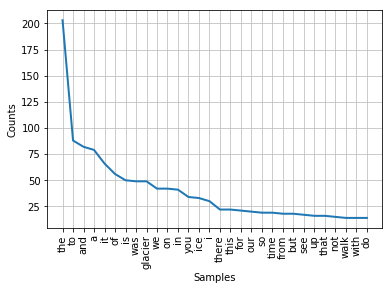

In [114]:
%mtplotlib inline
LowerFreqs.plot(30)

In [115]:
stopwords=nltk.corpus.stopwords.words("english")

In [116]:
print(stopwords)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', 'her', 'hers', 'herself', 'it', 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', 'too', 'very', 's', 't', 'can', 'will', 'just', 'don', 'should', 'no

In [117]:
LowerContentWordTokens=[]

for token in LowerWordTokens:
    if token not in stopwords:
        LowerContentWordTokens.append(token)
LowerContentWordTokens

['reviewit',
 'thrilling',
 'take',
 'bus',
 'onto',
 'glacier',
 'walk',
 'around',
 'parked',
 'rv',
 'parking',
 'lot',
 'facing',
 'glacier',
 'excursion',
 'hard',
 'describe',
 'beautiful',
 'scenery',
 'must',
 'see',
 'far',
 'glacier',
 'glass',
 'sidewalk',
 'canyon',
 'real',
 'mind',
 'blower',
 'rocky',
 'mountains',
 'truly',
 'rejuvenate',
 'soul',
 'parked',
 'glacier',
 'car',
 'park',
 'side',
 'road',
 'main',
 'park',
 'centre',
 'car',
 'park',
 'gets',
 'quite',
 'full',
 'manage',
 'jag',
 'spot',
 'immediately',
 'walk',
 'bottom',
 'glacier',
 'quite',
 'steep',
 'takes',
 'mins',
 'least',
 'depending',
 'feel',
 'also',
 'bit',
 'slippery',
 'loose',
 'gravel',
 'rocks',
 'way',
 'note',
 'signs',
 'show',
 'glacier',
 'recent',
 'past',
 'people',
 'say',
 'climate',
 'change',
 'may',
 'normal',
 'natural',
 'cyclical',
 'reasons',
 'glacier',
 'definitely',
 'receding',
 'found',
 'interesting',
 'see',
 'scratches',
 'rock',
 'glacier',
 'moved',
 'reason

In [118]:
LowerContentFreqs=nltk.FreqDist(LowerContentWordTokens)
LowerContentFreqs

FreqDist({'able': 1,
          'absolutely': 1,
          'access': 1,
          'accessible': 1,
          'across': 3,
          'actual': 4,
          'adventure': 2,
          'afar': 1,
          'al': 1,
          'alley': 1,
          'allowing': 1,
          'allows': 2,
          'almost': 2,
          'along': 2,
          'also': 5,
          'although': 2,
          'always': 2,
          'amazing': 7,
          'america': 1,
          'anniversary': 1,
          'another': 2,
          'answered': 1,
          'answering': 2,
          'anyone': 2,
          'appreciated': 1,
          'approach': 1,
          'area': 5,
          'around': 3,
          'arrival': 1,
          'arrived': 1,
          'aspects': 1,
          'astronomer': 1,
          'athabasca': 3,
          'attendants': 1,
          'attraction': 1,
          'available': 2,
          'away': 1,
          'awe': 1,
          'back': 4,
          'bad': 1,
          'banff': 4,
          'base': 2,
     

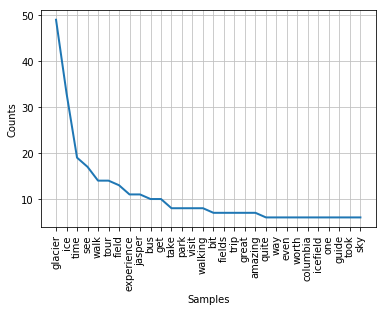

In [119]:
LowerContentFreqs.plot(30)

# List of content word tokens that are lowered and removed from stopwords:

In [214]:
print(LowerContentWordTokens)

['reviewit', 'thrilling', 'take', 'bus', 'onto', 'glacier', 'walk', 'around', 'parked', 'rv', 'parking', 'lot', 'facing', 'glacier', 'excursion', 'hard', 'describe', 'beautiful', 'scenery', 'must', 'see', 'far', 'glacier', 'glass', 'sidewalk', 'canyon', 'real', 'mind', 'blower', 'rocky', 'mountains', 'truly', 'rejuvenate', 'soul', 'parked', 'glacier', 'car', 'park', 'side', 'road', 'main', 'park', 'centre', 'car', 'park', 'gets', 'quite', 'full', 'manage', 'jag', 'spot', 'immediately', 'walk', 'bottom', 'glacier', 'quite', 'steep', 'takes', 'mins', 'least', 'depending', 'feel', 'also', 'bit', 'slippery', 'loose', 'gravel', 'rocks', 'way', 'note', 'signs', 'show', 'glacier', 'recent', 'past', 'people', 'say', 'climate', 'change', 'may', 'normal', 'natural', 'cyclical', 'reasons', 'glacier', 'definitely', 'receding', 'found', 'interesting', 'see', 'scratches', 'rock', 'glacier', 'moved', 'reasonably', 'hard', 'walk', 'glacier', 'fewer', 'people', 'might', 'expected', 'seeing', 'busy', 'c

# Tokenizing sentences (pre-requirements for sentiment analysis):

In [121]:
from nltk.tokenize import sent_tokenize

In [122]:
def tokenSentences(textIn):
    theSentences=sent_tokenize(textIn)
    return theSentences

In [124]:
SentenceTokens=tokenSentences(data_string)
len(SentenceTokens)

127

In [125]:
print(SentenceTokens)

['ReviewIt was thrilling to take the bus onto the glacier and walk around it.', 'We parked our RV in the parking lot facing the glacier after the excursion.', 'It is hard to describe how beautiful the scenery is....a must see.', 'Not far from the glacier is the glass sidewalk over the canyon....a real mind blower.', 'The Rocky Mountains truly rejuvenate the soul.', '"We parked at the glacier car park (on the other side of the road to the main park centre).', 'The car park gets quite full but we did manage to jag a spot immediately.', 'The walk up from there to the bottom of the glacier is quite steep and takes 10-20 mins at least depending on how you feel.', 'It can also be a bit slippery with loose gravel and rocks.', 'On the way, note the signs that show where the glacier was in the recent past - and some people say there is no climate change?', 'It may be for normal, natural, cyclical reasons but the glacier is definitely receding.', 'I found it interesting to see the scratches on t

In [126]:
type(SentenceTokens)

list

In [127]:
import re
def tokenizer(txt2Token):
    theTokens=re.findall(r'\b\w[\w-]*\b', txt2Token.lower())
    return theTokens

In [129]:
TokensOfSent=tokenizer(tokenSentences(data_string)[0])
print(TokensOfSent)

['reviewit', 'was', 'thrilling', 'to', 'take', 'the', 'bus', 'onto', 'the', 'glacier', 'and', 'walk', 'around', 'it']


# How Geoffrey does it:

In [135]:
ls *.txt

 Volume in drive C has no label.
 Volume Serial Number is 5682-6DAE

 Directory of C:\Users\Papar

30/10/2017  09:37 AM                 0 1986.txt
30/10/2017  09:43 AM                 0 Anthony86.txt
16/09/2017  02:31 PM               263 ASCII_LOGO.txt
02/10/2017  11:39 PM               124 bigdata.txt
14/10/2017  02:05 PM             2,665 funConcordance.txt
04/11/2017  09:43 AM                49 Negative.words.txt
30/11/2017  12:07 PM                 0 nly_reviews.txt
04/11/2017  09:33 AM                53 Obama.tweets.txt
30/11/2017  12:04 PM            14,961 Only_reviews.txt
16/10/2017  10:37 AM         1,223,517 Output.txt
29/10/2017  12:11 PM                 0 Output2.txt
04/11/2017  09:42 AM                49 Positive.words.txt
16/10/2017  10:37 AM            57,698 powerConcordance.txt
16/09/2017  02:31 PM                69 requirements.txt
30/10/2017  09:55 AM                 0 Robbins1986.txt
30/10/2017  09:39 AM         1,137,388 Robbins1991.txt
29/11/2017  11:33 AM       

In [217]:
from nltk.corpus import PlaintextCorpusReader
sonnetsCorpus = PlaintextCorpusReader("Only_reviews", ".*\.txt")
print(len(sonnetsCorpus.fileids()))

2


In [218]:
type(sonnetsCorpus)

nltk.corpus.reader.plaintext.PlaintextCorpusReader

In [219]:
print(sonnetsCorpus)

<PlaintextCorpusReader in 'C:\\Users\\Papar\\Only_reviews'>


In [223]:
Tokens = [sonnetsCorpus.words(fileid) for fileid in sonnetsCorpus.fileids()]

In [225]:
type(Tokens)

list

In [224]:
Tokens

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xca in position 73: invalid continuation byte

In [146]:
def multiply(left, right=1):
    return left * right

multiply(5) # 5 (second argument is 1 by default)
multiply(5, 5) # 25

25

In [226]:
import nltk

def get_lists_of_words(corpus, **kwargs): # the ** in front of kwargs does the magic of keyword arguments
    documents = [] # list of documents where each document is a list of words
    for fileid in corpus.fileids(): # go trough each file in our corpus
        
        # keep only words and convert them to lowercase
        words = [token.lower() for token in corpus.words(fileid) if token[0].isalpha()]
        
        # look for "minLength" in our keyword arguments and if it's defined, filter our list
        if "minLen" in kwargs and kwargs["minLen"]: 
            words = [word for word in words if len(word) >= kwargs["minLen"]]
        
        # look for "stopwords" in our keyword arguments and if any are defined, filter our list
        if "stopwords" in kwargs and kwargs["stopwords"]: 
            words = [word for word in words if word not in kwargs["stopwords"]]

        # look for "pos" in our keyword arguments and if any are defined, filter our list
        if "pos" in kwargs and kwargs["pos"]: 
            tagged = nltk.pos_tag(words)
            words = [word for word, pos in tagged if pos in kwargs["pos"]]
        
        documents.append(words) # add our list of words
    
    return documents # return our list of documents

In [227]:
get_lists_of_words(sonnetsCorpus)

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xca in position 73: invalid continuation byte

In [229]:
from gensim import corpora, models

def get_lda_from_lists_of_words(lists_of_words, **kwargs):
    dictionary = corpora.Dictionary(lists_of_words) # this dictionary maps terms to integers
    corpus = [dictionary.doc2bow(text) for text in lists_of_words] # create a bag of words from each document
    tfidf = models.TfidfModel(corpus) # this models the significance of words by document
    corpus_tfidf = tfidf[corpus]
    kwargs["id2word"] = dictionary # set the dictionary
    return models.LdaModel(corpus_tfidf, **kwargs) # do the LDA topic modelling

In [234]:
print(dictionary)

Dictionary(629 unique tokens: ['thrill', 'take', 'bu', 'onto', 'glacier']...)


In [236]:
sonnetsLda = get_lda_from_lists_of_words(dictionary.token2id, num_topics=10, passes=20) # small corpus, so more passes
print(sonnetsLda)

TypeError: doc2bow expects an array of unicode tokens on input, not a single string

# Topic Modeling for Fun and Profit:
--https://radimrehurek.com/topic_modeling_tutorial/2%20-%20Topic%20Modeling.html--

In [239]:
import logging
import itertools

import numpy as np
import gensim

In [242]:
logging.basicConfig(format='%(levelname)s : %(message)s', level=logging.INFO)
logging.root.level = logging.INFO # ipython sometimes messes up the logging setup; restore

In [243]:
def head(stream, n=10):
    #Convenience fnc: return the first `n` elements of the stream, as plain list
    return list(itertools.islice(stream, n))

In [244]:
from gensim.utils import smart_open, simple_preprocess
from gensim.corpora.wikicorpus import _extract_pages, filter_wiki
from gensim.parsing.preprocessing import STOPWORDS

In [245]:
def tokenize(text):
    return [token for token in simple_preprocess(text) if token not in STOPWORDS]

In [247]:
tokenize(data_string)

['reviewit',
 'thrilling',
 'bus',
 'glacier',
 'walk',
 'parked',
 'rv',
 'parking',
 'lot',
 'facing',
 'glacier',
 'excursion',
 'hard',
 'beautiful',
 'scenery',
 'far',
 'glacier',
 'glass',
 'sidewalk',
 'canyon',
 'real',
 'mind',
 'blower',
 'rocky',
 'mountains',
 'truly',
 'rejuvenate',
 'soul',
 'parked',
 'glacier',
 'car',
 'park',
 'road',
 'main',
 'park',
 'centre',
 'car',
 'park',
 'gets',
 'manage',
 'jag',
 'spot',
 'immediately',
 'walk',
 'glacier',
 'steep',
 'takes',
 'mins',
 'depending',
 'feel',
 'bit',
 'slippery',
 'loose',
 'gravel',
 'rocks',
 'way',
 'note',
 'signs',
 'glacier',
 'recent',
 'past',
 'people',
 'climate',
 'change',
 'normal',
 'natural',
 'cyclical',
 'reasons',
 'glacier',
 'definitely',
 'receding',
 'interesting',
 'scratches',
 'rock',
 'glacier',
 'moved',
 'reasonably',
 'hard',
 'walk',
 'glacier',
 'fewer',
 'people',
 'expected',
 'seeing',
 'busy',
 'centre',
 'road',
 'cold',
 'day',
 'noticeably',
 'colder',
 'glacier',
 'ca